<a href="https://colab.research.google.com/github/Andru-1987/74235-_DataScience_I/blob/main/clase_4/ejercicio-practioco/clase_imputacion_arreglado_imputacion_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


In [ ]:
URL_DATASET = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"

In [ ]:
dataframe = pd.read_csv(URL_DATASET)

In [ ]:
dataframe

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
MARKET_STORE_URL = "https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/market_data.csv"

In [ ]:
class MarketStore:
    def __init__(self, url):
        self.url = url
        self.dataframe = None
        self.dataframe_imputed_knn = None

    def get_dataframe(self):
        self.dataframe = pd.read_csv(self.url)
        return self.dataframe

    def get_information(self):
        print("\nInformacion de los primeros registros")
        print(self.dataframe.head())
        print("\nInformacion sobre los datos  columnas y valores nulls")
        print(self.dataframe.info())
        print("\nInformacion estadistica de los datos")
        print(self.dataframe.describe().transpose())

    def nullish_counting(self):
        # return self.dataframe.isnull().sum()
        total_rows= len(self.dataframe)
        null_percentage = (self.dataframe.isnull().sum() / total_rows) * 100
        null_percentage_sorted = null_percentage.sort_values(ascending=False)


        plt.figure(figsize=(16, 9))
        ax = null_percentage_sorted.plot(kind='bar', color="skyblue")
        ax.set_xlabel("Columnas")
        ax.set_ylabel("Porcentaje de valores nulos")
        ax.set_title("Porcentaje de valores nulos por columna")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        plt.show()

    def imputar_manual(self):

        data_fullfilled = self.dataframe.copy()

        for col in self.dataframe.select_dtypes(include=['object']).columns:
            self.dataframe[col].fillna(self.dataframe[col].mode()[0], inplace=True)

        for col in self.dataframe.select_dtypes(include=['number']).columns:
            self.dataframe[col].fillna(self.dataframe[col].mean(), inplace=True)


    def imputacion_knn_imputer(self, n_neighbors=4):
        # Copia del dataset original
        df_encoder = self.dataframe.copy()
        encoders = {}

        # Detectar columnas categóricas
        category_columns = df_encoder.select_dtypes(include=['object', 'category']).columns

        for col in category_columns:
            print(f"Se le aplicará el siguiente mapeo a la columna: {col}")
            le = LabelEncoder()
            # hacer una mascara para evitar los valores no existen como nan values
            # como datos categoricos
            not_null_values = df_encoder[col].notnull()
            df_encoder.loc[not_null_values, col] = le.fit_transform(df_encoder.loc[not_null_values, col]).astype(str)
            df_encoder.loc[~not_null_values,col] = np.nan
            encoders[col] = le

        # Imputación con KNN
        imputer = KNNImputer(n_neighbors=n_neighbors)
        data_imputed = imputer.fit_transform(df_encoder)
        self.dataframe_imputed_knn = pd.DataFrame(data_imputed, columns=df_encoder.columns)

        # Decodificación
        df_decoded = self.dataframe_imputed_knn.copy()
        for col, le in encoders.items():
            if col in df_decoded.columns:
                print(f"Se le aplicará el decoding para: {col}")
                df_decoded[col] = le.inverse_transform(df_decoded[col].astype(int))

        self.dataframe_imputed_knn = df_decoded


    def plot_distribution(self,columna):

        if pd.api.types.is_numeric_dtype(self.dataframe[columna]):
            plt.figure(figsize=(16, 9))
            plt.subplot(1, 2, 1)
            plt.boxplot(self.dataframe[columna])
            plt.title(f'Boxplot de {columna}')

            plt.subplot(1, 2, 2)
            plt.hist(self.dataframe[columna], bins=20, edgecolor='k')
            plt.title(f'Histograma de {columna}')
            plt.tight_layout()
            plt.show()
        else:
            plt.figure(figsize=(16, 9))
            self.dataframe[columna].value_counts().plot(kind='bar')
            plt.title(f'Frecuencia de {columna}')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    def plot_distribution_knn(self,columna):

        if pd.api.types.is_numeric_dtype(self.dataframe_imputed_knn[columna]):
            plt.figure(figsize=(16, 9))
            plt.subplot(1, 2, 1)
            plt.boxplot(self.dataframe_imputed_knn[columna])
            plt.title(f'Boxplot de {columna}')

            plt.subplot(1, 2, 2)
            plt.hist(self.dataframe_imputed_knn[columna], bins=20, edgecolor='k')
            plt.title(f'Histograma de {columna}')
            plt.tight_layout()
            plt.show()
        else:
            plt.figure(figsize=(16, 9))
            self.dataframe_imputed_knn[columna].value_counts().plot(kind='bar')
            plt.title(f'Frecuencia de {columna}')
            plt.xlabel(columna)
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()



In [ ]:
market_store = MarketStore(MARKET_STORE_URL)


In [ ]:
market_store.get_dataframe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
# market_store.get_information()

In [ ]:
# market_store.nullish_counting()

In [ ]:
# market_store.dataframe.Outlet_Size.value_counts()
# market_store.imputar_manual()

In [ ]:
# market_store.nullish_counting()

In [ ]:
# market_store.plot_distribution("Outlet_Size")
# market_store.plot_distribution("Item_Weight")

In [ ]:
market_store.imputacion_knn_imputer(4)

Se le aplicará el siguiente mapeo a la columna: Item_Identifier
Se le aplicará el siguiente mapeo a la columna: Item_Fat_Content
Se le aplicará el siguiente mapeo a la columna: Item_Type
Se le aplicará el siguiente mapeo a la columna: Outlet_Identifier
Se le aplicará el siguiente mapeo a la columna: Outlet_Size
Se le aplicará el siguiente mapeo a la columna: Outlet_Location_Type
Se le aplicará el siguiente mapeo a la columna: Outlet_Type
Se le aplicará el decoding para: Item_Identifier
Se le aplicará el decoding para: Item_Fat_Content
Se le aplicará el decoding para: Item_Type
Se le aplicará el decoding para: Outlet_Identifier
Se le aplicará el decoding para: Outlet_Size
Se le aplicará el decoding para: Outlet_Location_Type
Se le aplicará el decoding para: Outlet_Type


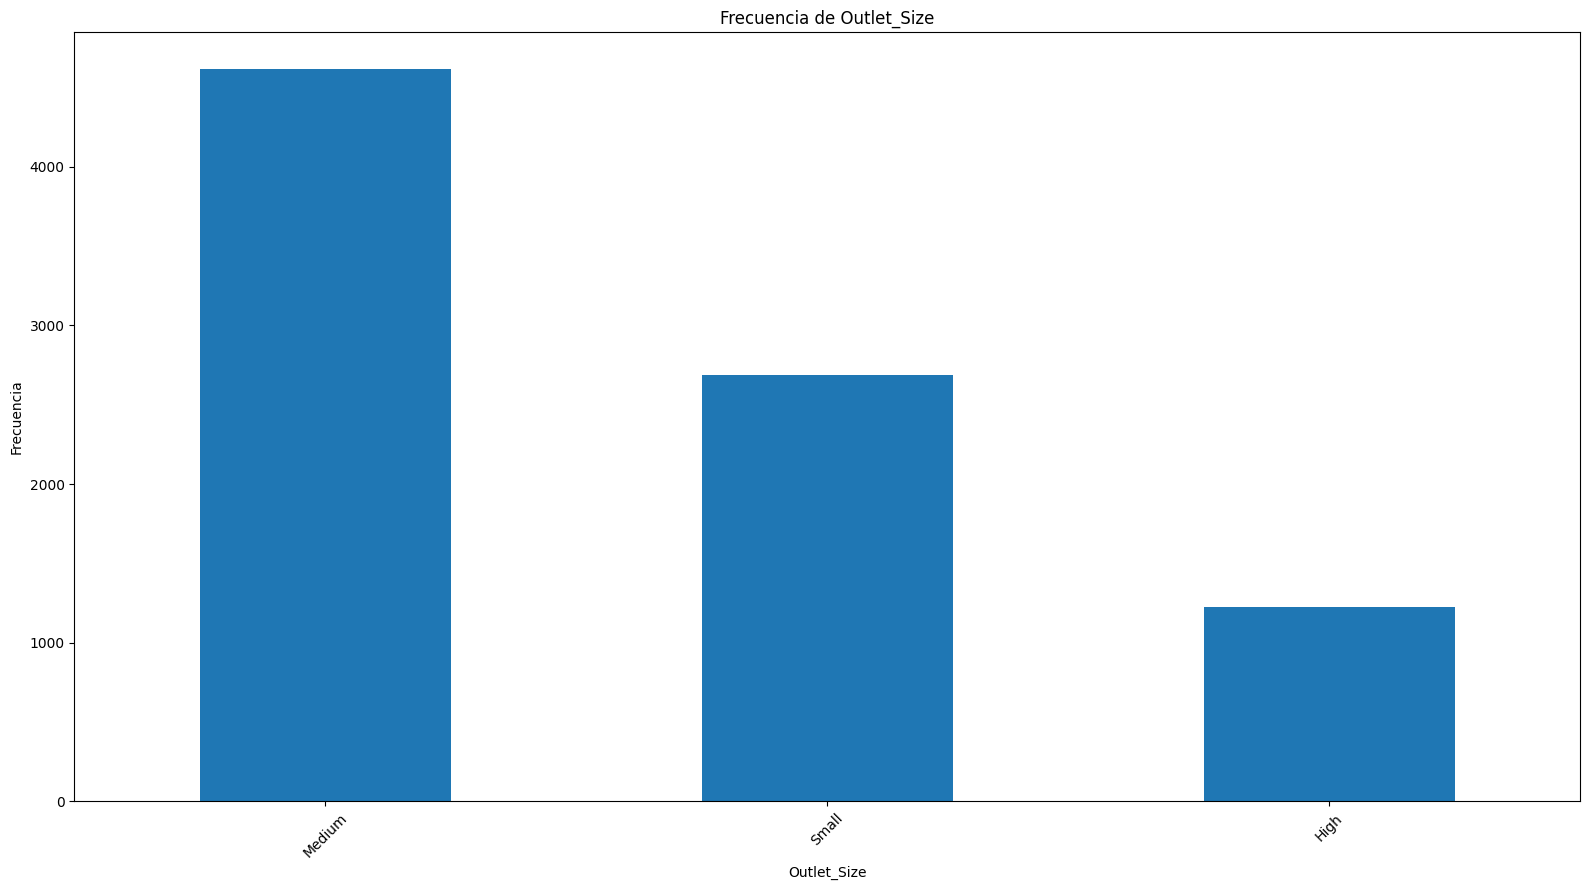

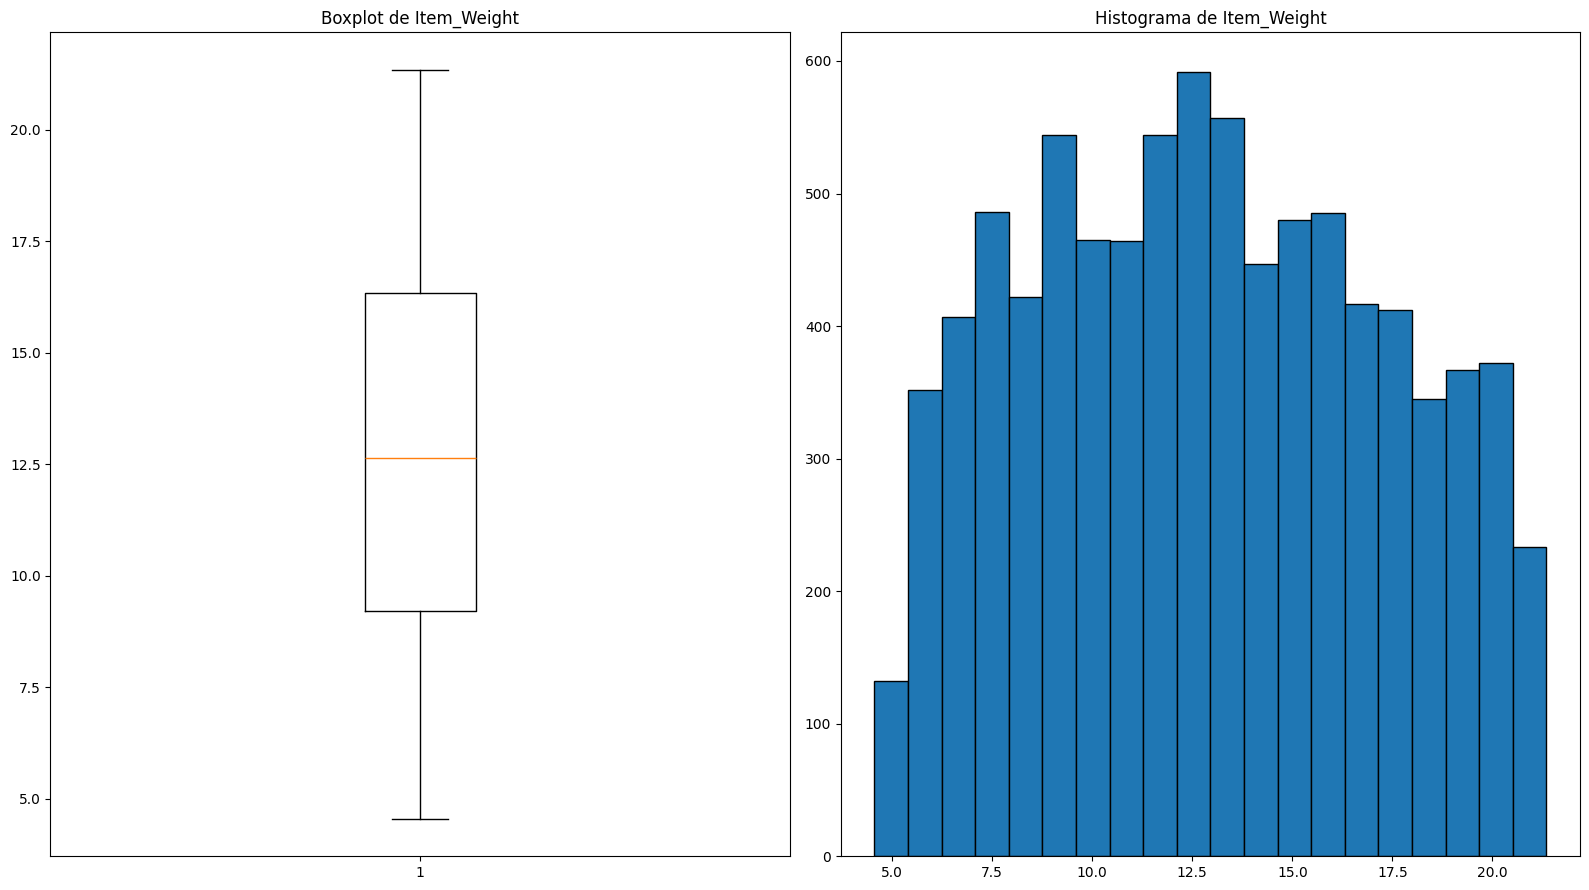

In [ ]:
# Ahora como podremos observar los valores por medio del KnnImputer son muchos mas uniformes
# entregandonos una forma mas adecuada de imputar los datos

market_store.plot_distribution_knn("Outlet_Size")
market_store.plot_distribution_knn("Item_Weight")
